In [1]:
# import all from imports.py
from imports import *

# # !!! Warning !!! 
# # *** no more warnings ***
import warnings
warnings.filterwarnings("ignore")

# custom mods
from tidy import *
from wrangle import *
from model import *

In [2]:
df = wrangle_df()

cached csv


In [3]:
df.head()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,macd,...,atr_above_threshold_0.3,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners,sentiment,obv_close_product
2014-10-20,389.230988,390.084015,378.252014,382.845001,16419000.0,0.009437,3.630005,0.009482,1.0,-6.216836,...,False,0.059651,2.830044,24.826121,3.500248e+10,233157.697776,1.747486e+06,4198.799233,0.234784,0.458883
2014-10-21,382.420990,392.645996,380.834015,386.475006,14188900.0,-0.008620,-3.317016,-0.008583,0.0,-5.196584,...,False,0.060749,2.830044,20.194035,3.500248e+10,233157.697776,1.903490e+06,5726.216590,0.274812,0.510393
2014-10-22,386.118011,388.575989,382.248993,383.157990,11641300.0,-0.066750,-24.740998,-0.064571,0.0,-4.602627,...,False,0.060749,2.830044,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590,0.258505,0.465414
2014-10-23,382.962006,385.048004,356.446991,358.416992,26456900.0,-0.000201,-0.071991,-0.000201,0.0,-6.058464,...,False,0.060749,2.566983,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590,0.277373,0.286309
2014-10-24,358.591003,364.345001,353.304993,358.345001,15585700.0,-0.031391,-11.074005,-0.030903,0.0,-7.135779,...,False,0.056403,2.566983,18.762679,3.500248e+10,297537.062088,1.603290e+06,4819.681933,0.276173,0.302494


In [4]:
def add_df_circ(df):
    '''
    
    '''
    df_circ = pd.read_csv('circulation_btc.csv')
    df_circ['Timestamp'] = pd.to_datetime(df_circ['Timestamp'])
    df_circ = df_circ.set_index('Timestamp')
    df_circ = df_circ.resample('D').mean()
    df = df.join(df_circ)
    
    df['flow'] = df['total-bitcoins'] - df['total-bitcoins'].shift(1)
    # Add a new column that is the daily df.total-bitcoins to df.flow ratio
    df['stock_flow_ratio'] = df['flow'] / df['total-bitcoins']
    # Column for if stock_flow_ratio of today went up or down from yesterday
    df['stock_flow_ratio_change'] = df['stock_flow_ratio'].shift(1) - df['stock_flow_ratio']
    return df

In [5]:
df = add_df_circ(df)

In [6]:
df.head()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,macd,...,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners,sentiment,obv_close_product,total-bitcoins,flow,stock_flow_ratio,stock_flow_ratio_change
2014-10-20,389.230988,390.084015,378.252014,382.845001,16419000.0,0.009437,3.630005,0.009482,1.0,-6.216836,...,3.500248e+10,233157.697776,1.747486e+06,4198.799233,0.234784,0.458883,NaN,NaN,NaN,NaN
2014-10-21,382.420990,392.645996,380.834015,386.475006,14188900.0,-0.008620,-3.317016,-0.008583,0.0,-5.196584,...,3.500248e+10,233157.697776,1.903490e+06,5726.216590,0.274812,0.510393,NaN,NaN,NaN,NaN
2014-10-22,386.118011,388.575989,382.248993,383.157990,11641300.0,-0.066750,-24.740998,-0.064571,0.0,-4.602627,...,3.500248e+10,297537.062088,1.903490e+06,5726.216590,0.258505,0.465414,NaN,NaN,NaN,NaN
2014-10-23,382.962006,385.048004,356.446991,358.416992,26456900.0,-0.000201,-0.071991,-0.000201,0.0,-6.058464,...,3.500248e+10,297537.062088,1.903490e+06,5726.216590,0.277373,0.286309,NaN,NaN,NaN,NaN
2014-10-24,358.591003,364.345001,353.304993,358.345001,15585700.0,-0.031391,-11.074005,-0.030903,0.0,-7.135779,...,3.500248e+10,297537.062088,1.603290e+06,4819.681933,0.276173,0.302494,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2770 entries, 2014-10-20 to 2022-05-24
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          2770 non-null   float64
 1   high                          2770 non-null   float64
 2   low                           2770 non-null   float64
 3   close                         2770 non-null   float64
 4   volume                        2770 non-null   float64
 5   fwd_log_ret                   2770 non-null   float64
 6   fwd_ret                       2770 non-null   float64
 7   fwd_pct_chg                   2770 non-null   float64
 8   fwd_close_positive            2770 non-null   float64
 9   macd                          2770 non-null   float64
 10  signal                        2770 non-null   float64
 11  histo                         2770 non-null   float64
 12  cross                         2770 non-null 

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1073 entries, 2019-06-04 to 2022-05-24
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          1073 non-null   float64
 1   high                          1073 non-null   float64
 2   low                           1073 non-null   float64
 3   close                         1073 non-null   float64
 4   volume                        1073 non-null   float64
 5   fwd_log_ret                   1073 non-null   float64
 6   fwd_ret                       1073 non-null   float64
 7   fwd_pct_chg                   1073 non-null   float64
 8   fwd_close_positive            1073 non-null   float64
 9   macd                          1073 non-null   float64
 10  signal                        1073 non-null   float64
 11  histo                         1073 non-null   float64
 12  cross                         1073 non-null 

In [10]:
df.close.sum() - df.open.sum()

14526.277316000313

In [11]:
# Splits
def split_i(df):
    train = df.loc[:'2022-3-22']
    validate =df.loc['2022-03-23':'2022-04-23'] 
    return train, validate

def split_ii(df):
    train = df.loc[:'2022-04-24']
    test = df.loc['2022-04-25':]
    return train, test

In [12]:
# Scaling our continuous variables
quants = [
        'open', 'high', 'low', 'close', 'volume', 'avg-fees-per-transaction', 'cost-per-transaction-percent', 
        'cost-per-transaction', 'difficulty', 'hash-rate', 'miners-revenue', 'transaction-fees-to-miners',
        'total-bitcoins', 'flow', 'stock_flow_ratio', 'stock_flow_ratio_change', 'sentiment'
         ]
scaler = MinMaxScaler()


In [13]:
train_i, validate_i = split_i(df)
train_ii, test_ii = split_ii(df)

In [14]:
# Scaling for the initial train/validate split

scaler.fit(train_i[quants])

train_i[quants] = scaler.transform(train_i[quants])
validate_i[quants] = scaler.transform(validate_i[quants])

In [15]:
train_i.head()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,macd,...,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners,sentiment,obv_close_product,total-bitcoins,flow,stock_flow_ratio,stock_flow_ratio_change
2019-06-04,0.051296,0.045371,0.055520,0.043725,0.038773,0.014996,116.460449,0.015109,1.0,431.378438,...,0.002446,0.046071,0.106265,0.095422,0.189304,0.217429,0.000000,0.202627,0.218520,0.667220
2019-06-05,0.043196,0.040500,0.057193,0.045585,0.030383,-0.000282,-2.208007,-0.000282,0.0,365.125029,...,0.002446,0.046071,0.106265,0.095422,0.195343,0.273909,0.001589,0.397749,0.416154,0.334401
2019-06-06,0.045039,0.041059,0.055632,0.045550,0.023649,0.027977,221.927734,0.028372,1.0,308.879982,...,0.002446,0.046071,0.141179,0.051823,0.190109,0.143375,0.003198,0.405253,0.423687,0.493656
2019-06-07,0.045155,0.044034,0.059115,0.049095,0.022667,-0.011229,-89.823242,-0.011167,0.0,278.996986,...,0.002446,0.053479,0.141179,0.051823,0.161844,0.259071,0.004796,0.401501,0.419818,0.503209
2019-06-08,0.048511,0.043258,0.059906,0.047660,0.014954,-0.034020,-266.050782,-0.033448,0.0,245.239543,...,0.002446,0.053479,0.141179,0.051823,0.177193,0.155670,0.006395,0.401501,0.419749,0.500024


In [16]:
# Dropping our target and all fwd columns (to avoid 'looking' into the future)
x_train_i = train_i.drop(columns=['fwd_log_ret', 'fwd_close_positive'])
x_train_ii = train_ii.drop(columns=['fwd_log_ret', 'fwd_close_positive'])

y_train_i = train_i['fwd_log_ret']
y_train_ii = train_ii['fwd_log_ret']

x_validate_i = validate_i.drop(columns=['fwd_log_ret', 'fwd_close_positive'])
x_test_ii = test_ii.drop(columns=['fwd_log_ret', 'fwd_close_positive'])

y_validate_i = validate_i['fwd_log_ret']
y_test_ii = test_ii['fwd_log_ret']

In [17]:
y_train_i = pd.DataFrame(y_train_i)
y_train_ii = pd.DataFrame(y_train_ii)

y_validate_i = pd.DataFrame(y_validate_i)
y_test_ii = pd.DataFrame(y_test_ii)

In [18]:
# Testing feature set 
target = 'fwd_log_ret'
features1 = ['open', 'high', 'low', 'close', 'volume', 'sentiment', 'stock_flow_ratio']

In [19]:
def ols_model(x_train, y_train, x_validate, y_validate, features, target):
    '''
    This function takes in our x and y components for train and validate and prints the results of RMSE for train and validate modeling.
    '''
    # Creation and fitting of the model
    lm = LinearRegression(normalize=True)
    lm.fit(x_train[features], y_train[target])
    # Prediction creation and RMSE value for train
    y_train['ret_lm_pred'] = lm.predict(x_train[features])
    rmse_train = round(mean_squared_error(y_train[target], y_train.ret_lm_pred)**(1/2), 6)
    # Prediction creation and RMSE for validate
    y_validate['ret_lm_pred'] = lm.predict(x_validate[features])
    rmse_validate = round(mean_squared_error(y_validate[target], y_validate.ret_lm_pred)**(1/2), 6)
    # Outputing the RMSE values
    print("RMSE for OLS using LinearRegression\nTraining: ", rmse_train,
            "\nValidation: ", rmse_validate)

In [20]:
ols_model(x_train_i, y_train_i, x_validate_i, y_validate_i, features1, target)

RMSE for OLS using LinearRegression
Training:  0.039459 
Validation:  0.023614


In [21]:
features2 = ['open', 'close', 'volume', 'sentiment', 'stock_flow_ratio' ]

In [22]:
ols_model(x_train_i, y_train_i, x_validate_i, y_validate_i, features2, target)

RMSE for OLS using LinearRegression
Training:  0.039477 
Validation:  0.023717


In [23]:
features3 = ['open', 'close', 'sentiment', 'stock_flow_ratio', 'cross', 'histy']

In [24]:
ols_model(x_train_i, y_train_i, x_validate_i, y_validate_i, features3, target)

RMSE for OLS using LinearRegression
Training:  0.039421 
Validation:  0.023959


<AxesSubplot:>

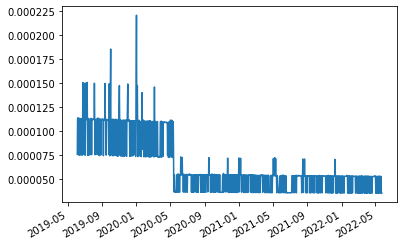

In [25]:
df.stock_flow_ratio.plot()

In [26]:
df3 = wrangle_3_df()

cached csv
running loop
reading avg-fees-per-transaction_3yr
adding avg-fees-per-transaction_3yr
reading cost-per-transaction-percent_3yr
adding cost-per-transaction-percent_3yr
reading cost-per-transaction_3yr
adding cost-per-transaction_3yr
reading difficulty_3yr
adding difficulty_3yr
reading hash-rate_3yr
adding hash-rate_3yr
reading miners-revenue_3yr
adding miners-revenue_3yr
reading transaction-fees-to-miners_3yr
adding transaction-fees-to-miners_3yr
done


In [27]:
df3.head()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,macd,...,flow,stock_flow_ratio,stock_flow_ratio_change,avg-fees-per-transaction_3yr,cost-per-transaction-percent_3yr,cost-per-transaction_3yr,difficulty_3yr,hash-rate_3yr,miners-revenue_3yr,transaction-fees-to-miners_3yr
2019-06-08,8036.774902,8076.891113,7837.610840,7954.127930,1.652272e+10,-0.034020,-266.050782,-0.033448,0.0,245.239543,...,0.0,0.0,0.000113,1.980147,2.396526,43.762328,7.459681e+12,5.456392e+07,1.288227e+07,582893.909291
2019-06-09,7949.674805,7975.974121,7583.219727,7688.077148,1.661073e+10,0.039812,312.252442,0.040615,1.0,194.773227,...,0.0,0.0,0.000075,1.627762,3.498270,49.066414,7.459681e+12,5.313360e+07,1.504048e+07,498962.708960
2019-06-10,7692.284668,8031.909668,7586.730957,8000.329590,1.868928e+10,-0.009118,-72.615235,-0.009077,0.0,177.923480,...,0.0,0.0,0.000113,2.246521,1.592973,45.557372,7.459681e+12,5.398120e+07,1.631842e+07,804692.654422
2019-06-11,8004.243652,8026.394043,7772.803711,7927.714355,1.710728e+10,0.027145,218.143067,0.027517,1.0,156.901824,...,0.0,0.0,0.000112,2.563458,0.938603,44.014417,7.459681e+12,5.599423e+07,1.498466e+07,872726.856256
2019-06-12,7925.434082,8196.648438,7862.359863,8145.857422,1.903443e+10,0.010389,85.066406,0.010443,1.0,156.045537,...,0.0,0.0,0.000075,2.662764,1.205745,42.747922,7.459681e+12,5.541151e+07,1.404115e+07,874622.138330


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1447 entries, 2019-06-08 to 2022-05-24
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   open                              1447 non-null   float64
 1   high                              1447 non-null   float64
 2   low                               1447 non-null   float64
 3   close                             1447 non-null   float64
 4   volume                            1447 non-null   float64
 5   fwd_log_ret                       1447 non-null   float64
 6   fwd_ret                           1447 non-null   float64
 7   fwd_pct_chg                       1447 non-null   float64
 8   fwd_close_positive                1447 non-null   float64
 9   macd                              1447 non-null   float64
 10  signal                            1447 non-null   float64
 11  histo                             1447 non-null   f

In [29]:
df3['total-bitcoins'].value_counts()

1.853109e+07    128
1.886634e+07    128
1.802744e+07    128
1.901436e+07      2
1.774788e+07      1
               ... 
1.839814e+07      1
1.839914e+07      1
1.840014e+07      1
1.840113e+07      1
1.904794e+07      1
Name: total-bitcoins, Length: 1065, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1073 entries, 2019-06-04 to 2022-05-24
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          1073 non-null   float64
 1   high                          1073 non-null   float64
 2   low                           1073 non-null   float64
 3   close                         1073 non-null   float64
 4   volume                        1073 non-null   float64
 5   fwd_log_ret                   1073 non-null   float64
 6   fwd_ret                       1073 non-null   float64
 7   fwd_pct_chg                   1073 non-null   float64
 8   fwd_close_positive            1073 non-null   float64
 9   macd                          1073 non-null   float64
 10  signal                        1073 non-null   float64
 11  histo                         1073 non-null   float64
 12  cross                         1073 non-null 

In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1447 entries, 2019-06-08 to 2022-05-24
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   open                              1447 non-null   float64
 1   high                              1447 non-null   float64
 2   low                               1447 non-null   float64
 3   close                             1447 non-null   float64
 4   volume                            1447 non-null   float64
 5   fwd_log_ret                       1447 non-null   float64
 6   fwd_ret                           1447 non-null   float64
 7   fwd_pct_chg                       1447 non-null   float64
 8   fwd_close_positive                1447 non-null   float64
 9   macd                              1447 non-null   float64
 10  signal                            1447 non-null   float64
 11  histo                             1447 non-null   f